In [56]:
import pandas as pd
from config import *

data = pd.read_csv('../Data/test/all_data.csv')

c:\Users\benja\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\benja\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\benja\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\benja\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\benja\AppData\Local\Programs\Python\Python

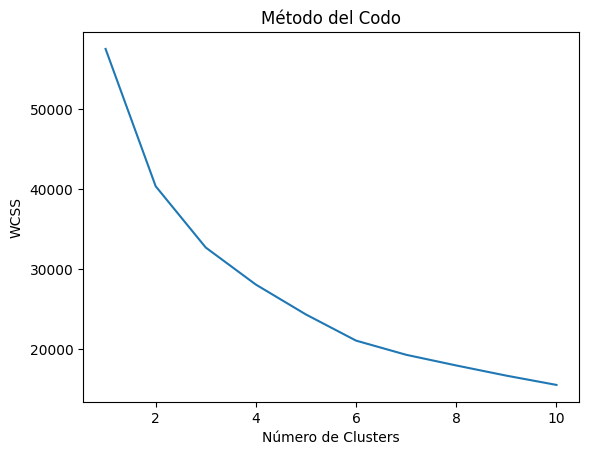

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['terrenoEdificado', 'coordX', 'coordY', 'barrioID']
data_for_clustering = data[features]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Escalar los datos para que todas las características tengan la misma escala

# Determinar el número óptimo de clusters utilizando el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=100, random_state=33)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Visualizar el método del codo para encontrar el número óptimo de clusters
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()


In [5]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=500, n_init=200, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Agregar la información de los clusters al DataFrame original
data['clusterKM'] = clusters

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

features_knn = ['terrenoEdificado', 'comisariaCercana', 'transporteCercano', 
                'saludCercana', 'coordX', 'coordY', 'barrioID']

data_for_knn_train = data[features_knn]
target_column = 'precioUSD'
target = data[target_column]

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_for_knn_train, target, train_size=0.8, random_state=33)

# Eliminar train_test_split y usar todo el conjunto de entrenamiento
scaler_knn = StandardScaler()
X_train_scaled = scaler_knn.fit_transform(X_train)

# Crear instancias de modelos con diferentes configuraciones
models = dict()
r2_scores = []
for i in range(1, 20):
    models[f'knn{i}'] = KNeighborsRegressor(n_neighbors=i, weights='distance', algorithm='ball_tree')
    m = KNeighborsRegressor(n_neighbors=i, weights='distance', algorithm='ball_tree')
    m.fit(X_train_scaled, y_train)
    scores_r2 = cross_val_score(m, X_train_scaled, y_train, cv=5, scoring='r2')
    r2_scores.append((f'knn{i}', scores_r2.mean()))

In [60]:
r2_scores

[('knn1', 0.6629971095497066),
 ('knn2', 0.7258530648702092),
 ('knn3', 0.747975549411929),
 ('knn4', 0.7582351925537547),
 ('knn5', 0.7630026000744163),
 ('knn6', 0.7653492205957688),
 ('knn7', 0.7676788959301056),
 ('knn8', 0.7683542863726724),
 ('knn9', 0.7687899223581864),
 ('knn10', 0.7692788245553543),
 ('knn11', 0.7697038148404822),
 ('knn12', 0.7695355995961093),
 ('knn13', 0.7689568621938163),
 ('knn14', 0.7684960738751092),
 ('knn15', 0.7681021664108623),
 ('knn16', 0.7670136643099507),
 ('knn17', 0.7662310152575207),
 ('knn18', 0.7651442079360878),
 ('knn19', 0.7644035231890504)]

In [61]:
from sklearn.ensemble import RandomForestRegressor

print("Creando Random Forest...")

random_forest_model = RandomForestRegressor(n_estimators=200, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)
scores_r2 = cross_val_score(random_forest_model, X_train_scaled, y_train, cv=5, scoring='r2')
      
print(f"Random Forest: r2 = {scores_r2.mean()}")

Creando Random Forest...
Random Forest: r2 = 0.7737199847778493


In [64]:
from sklearn.ensemble import GradientBoostingRegressor

print("Creando XGBoost...")

gradient_boosting_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
gradient_boosting_model.fit(X_train_scaled, y_train)
scores_r2 = cross_val_score(gradient_boosting_model, X_train_scaled, y_train, cv=5, scoring='r2')

print(f"XGBoost: r2 = {scores_r2.mean()}")

Creando XGBoost...
XGBoost: r2 = 0.7498413899793603


In [65]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

print("Creando AdaBoost...")

ada_boost_model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=15), n_estimators=200, random_state=42)
ada_boost_model.fit(X_train_scaled, y_train)
scores_r2 = cross_val_score(ada_boost_model, X_train_scaled, y_train, cv=5, scoring='r2')
    
print(f"AdaBoost: r2 = {scores_r2.mean()}")

Creando AdaBoost...
AdaBoost: r2 = 0.7837529217474214


In [66]:
sorted_models = [model[0] for model in sorted(r2_scores, key=lambda x: x[1], reverse=True)][:4]
models_w_weight = []
weights = [3,3,2,2]
for i in range(len(weights)):
    models_w_weight.append(((sorted_models[i], models[sorted_models[i]]), weights[i]))
    
models_w_weight.append((('RF', 
    RandomForestRegressor(n_estimators=800, random_state=42, max_depth=17)), 5))
models_w_weight.append((('XGBoost', 
    GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=8, random_state=42)), 5))
models_w_weight.append((('AdaBoost', 
    AdaBoostRegressor(DecisionTreeRegressor(max_depth=15), n_estimators=200, random_state=42)), 5))

In [67]:
from sklearn.ensemble import VotingRegressor

ensemble_model = VotingRegressor(estimators=[model[0] for model in models_w_weight], 
                                 weights=[w[1] for w in models_w_weight])
ensemble_model.fit(X_train_scaled, y_train)

# Escalar todos los datos
X_testing = X_test.copy()
X_test_scaled = scaler_knn.transform(X_test)
all_data_predictions = ensemble_model.predict(X_test_scaled)
X_testing.loc[:, 'precioUSDPredicted'] = all_data_predictions
X_testing.loc[:, "precioUSD"] = y_test

ensemble_r2 = cross_val_score(ensemble_model, X_train_scaled, y_train, cv=5, scoring='r2')

# Imprimir resultados
print(f"R^2 en el conjunto de prueba para el modelo ensamblado: {ensemble_r2}")

KeyboardInterrupt: 

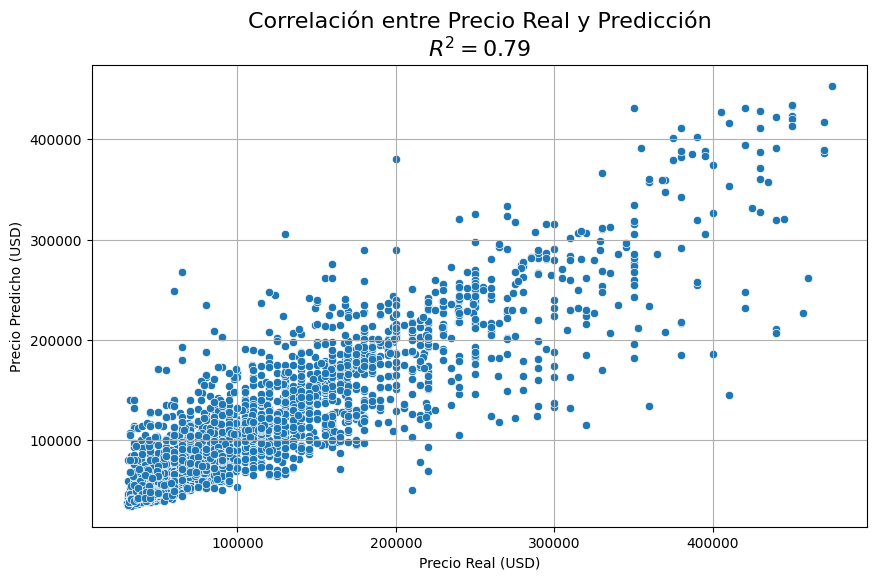

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crea un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=all_data_predictions)
plt.title(f'Correlación entre Precio Real y Predicción\n$R^2={ensemble_r2.mean():.2f}$', fontsize=16)
plt.xlabel('Precio Real (USD)')
plt.ylabel('Precio Predicho (USD)')
plt.grid(True)
plt.show()